In [ ]:
# %%capture
# !pip install pyheif
# !pip install Pillow

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

In [ ]:
import cv2
import imghdr
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import shutil

In [ ]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [ ]:
# drive.mount("/content/gdrive", force_remount=True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [ ]:
# /content/gdrive/MyDrive/Sea Cumcumber Images/live

In [ ]:
root_dir = "/content/drive/MyDrive/Sea Cumcumber Images/live"

## Image reading and converting

In [ ]:
#@title Default title text
# # changing .HEIC to .jpeg

# import pyheif
# from PIL import Image

# # Set the directory where you want to save the converted JPEG images

# input_dir = "/content/gdrive/MyDrive/Sea Cumcumber Images/live/Live - S.Naso"
# output_dir = "/content/gdrive/MyDrive/Sea Cumcumber Images/live/cleaned/Live - S.Naso"

# if not os.path.exists(output_dir):
#         os.mkdir(output_dir)
# # Loop over all files in the input directory
# for file_name in os.listdir(input_dir):
#     # Check if the file is a HEIC image
#     if file_name.endswith(".HEIC"):
#         # Open the HEIC image using pyheif
#         heif_file = pyheif.read(os.path.join(input_dir, file_name))
#         # Convert the HEIC image to RGB format using Pillow
#         image = Image.frombytes(
#             heif_file.mode,
#             heif_file.size,
#             heif_file.data,
#             "raw",
#             heif_file.mode,
#             heif_file.stride,
#         )
#         # Save the converted image as a JPEG file in the output directory
#         output_file_name = os.path.splitext(file_name)[0] + ".jpg"
#         image.save(os.path.join(output_dir, output_file_name), "JPEG")

In [ ]:
#@title Default title text
# import shutil

# # source_folder = "/content/gdrive/MyDrive/Sea Cumcumber Images/live/Live - B.Vitiensis"
# source_folder = input_dir
# # destination_folder = "/content/gdrive/MyDrive/Sea Cumcumber Images/live/cleaned/Live - B.Vitiensis"
# destination_folder = output_dir

# for filename in os.listdir(source_folder):
#     if filename.endswith('.jpeg') or filename.endswith('.jpg'):
#         # Construct the full paths for the source and destination files
#         source_path = os.path.join(source_folder, filename)
#         destination_path = os.path.join(destination_folder, filename)
        
#         # Copy the file to the destination folder
#         shutil.copy2(source_path, destination_path)

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
# directory_path = '/content/gdrive/MyDrive/Sea Cumcumber Images/live/cleaned'
# folder_path_list = [os.path.join(directory_path, folder) for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]
# folder_path_list

## Image Augmentation part

In [ ]:
#@title Default title text
# #@title Default title text
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def augment_images(input_dir, output_dir):
#   # Create the output directory if it doesn't exist
#   if not os.path.exists(output_dir):
#       os.makedirs(output_dir)

#   # Load the images from the input directory
#   images = []
#   for filename in os.listdir(input_dir):
#       img = tf.keras.preprocessing.image.load_img(
#           os.path.join(input_dir, filename),
#           target_size=(224, 224)  # Adjust the target size as needed
#       )
#       img_array = tf.keras.preprocessing.image.img_to_array(img)
#       images.append(img_array)

#       source_path = os.path.join(input_dir, filename)
#       destination_path = os.path.join(output_dir, filename)

#       shutil.copy2(source_path, destination_path)

#   # Convert the list of images to a NumPy array
#   images = tf.stack(images)

#   # Create an instance of ImageDataGenerator for augmentation
#   datagen = ImageDataGenerator(
#       rotation_range=20,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       width_shift_range=0.1,
#       height_shift_range=0.1
#   )

#   # Generate augmented images
#   augmented_images = datagen.flow(
#       x=images,
#       batch_size=1,  # Generate one augmented image at a time
#       save_to_dir=output_dir,
#       save_prefix='augmented_',
#       save_format='jpg'
#   )

#   # Specify the number of augmented images you want to generate
#   num_augmented_images = 10

#   # Generate and save the augmented images
#   for _ in range(num_augmented_images):
#       augmented_image = augmented_images.next()


#   print("Augmentation and saving of {} complete.".format(os.path.basename(input_dir)))

In [ ]:
#@title Default title text
# #@title Default title text
# for folder_path in folder_path_list:

#   input_dir = folder_path
#   output_dir = os.path.join(directory_path,'aug', os.path.basename(folder_path))

#   augment_images(input_dir, output_dir)

## Model training

In [ ]:
final_dataset_dir = '/content/drive/MyDrive/Sea Cumcumber Images/live/cleaned/aug'

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(final_dataset_dir)

Found 446 files belonging to 4 classes.


In [ ]:
class_names = sorted(os.listdir(final_dataset_dir))
class_names

['B.Vitiensis', 'H.Scabra', 'H.Spinifera', 'S.Naso']

In [ ]:
class_label_dict = {index : element for index,element in enumerate(class_names)}
class_label_dict

{0: 'B.Vitiensis', 1: 'H.Scabra', 2: 'H.Spinifera', 3: 'S.Naso'}

In [ ]:
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()

# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

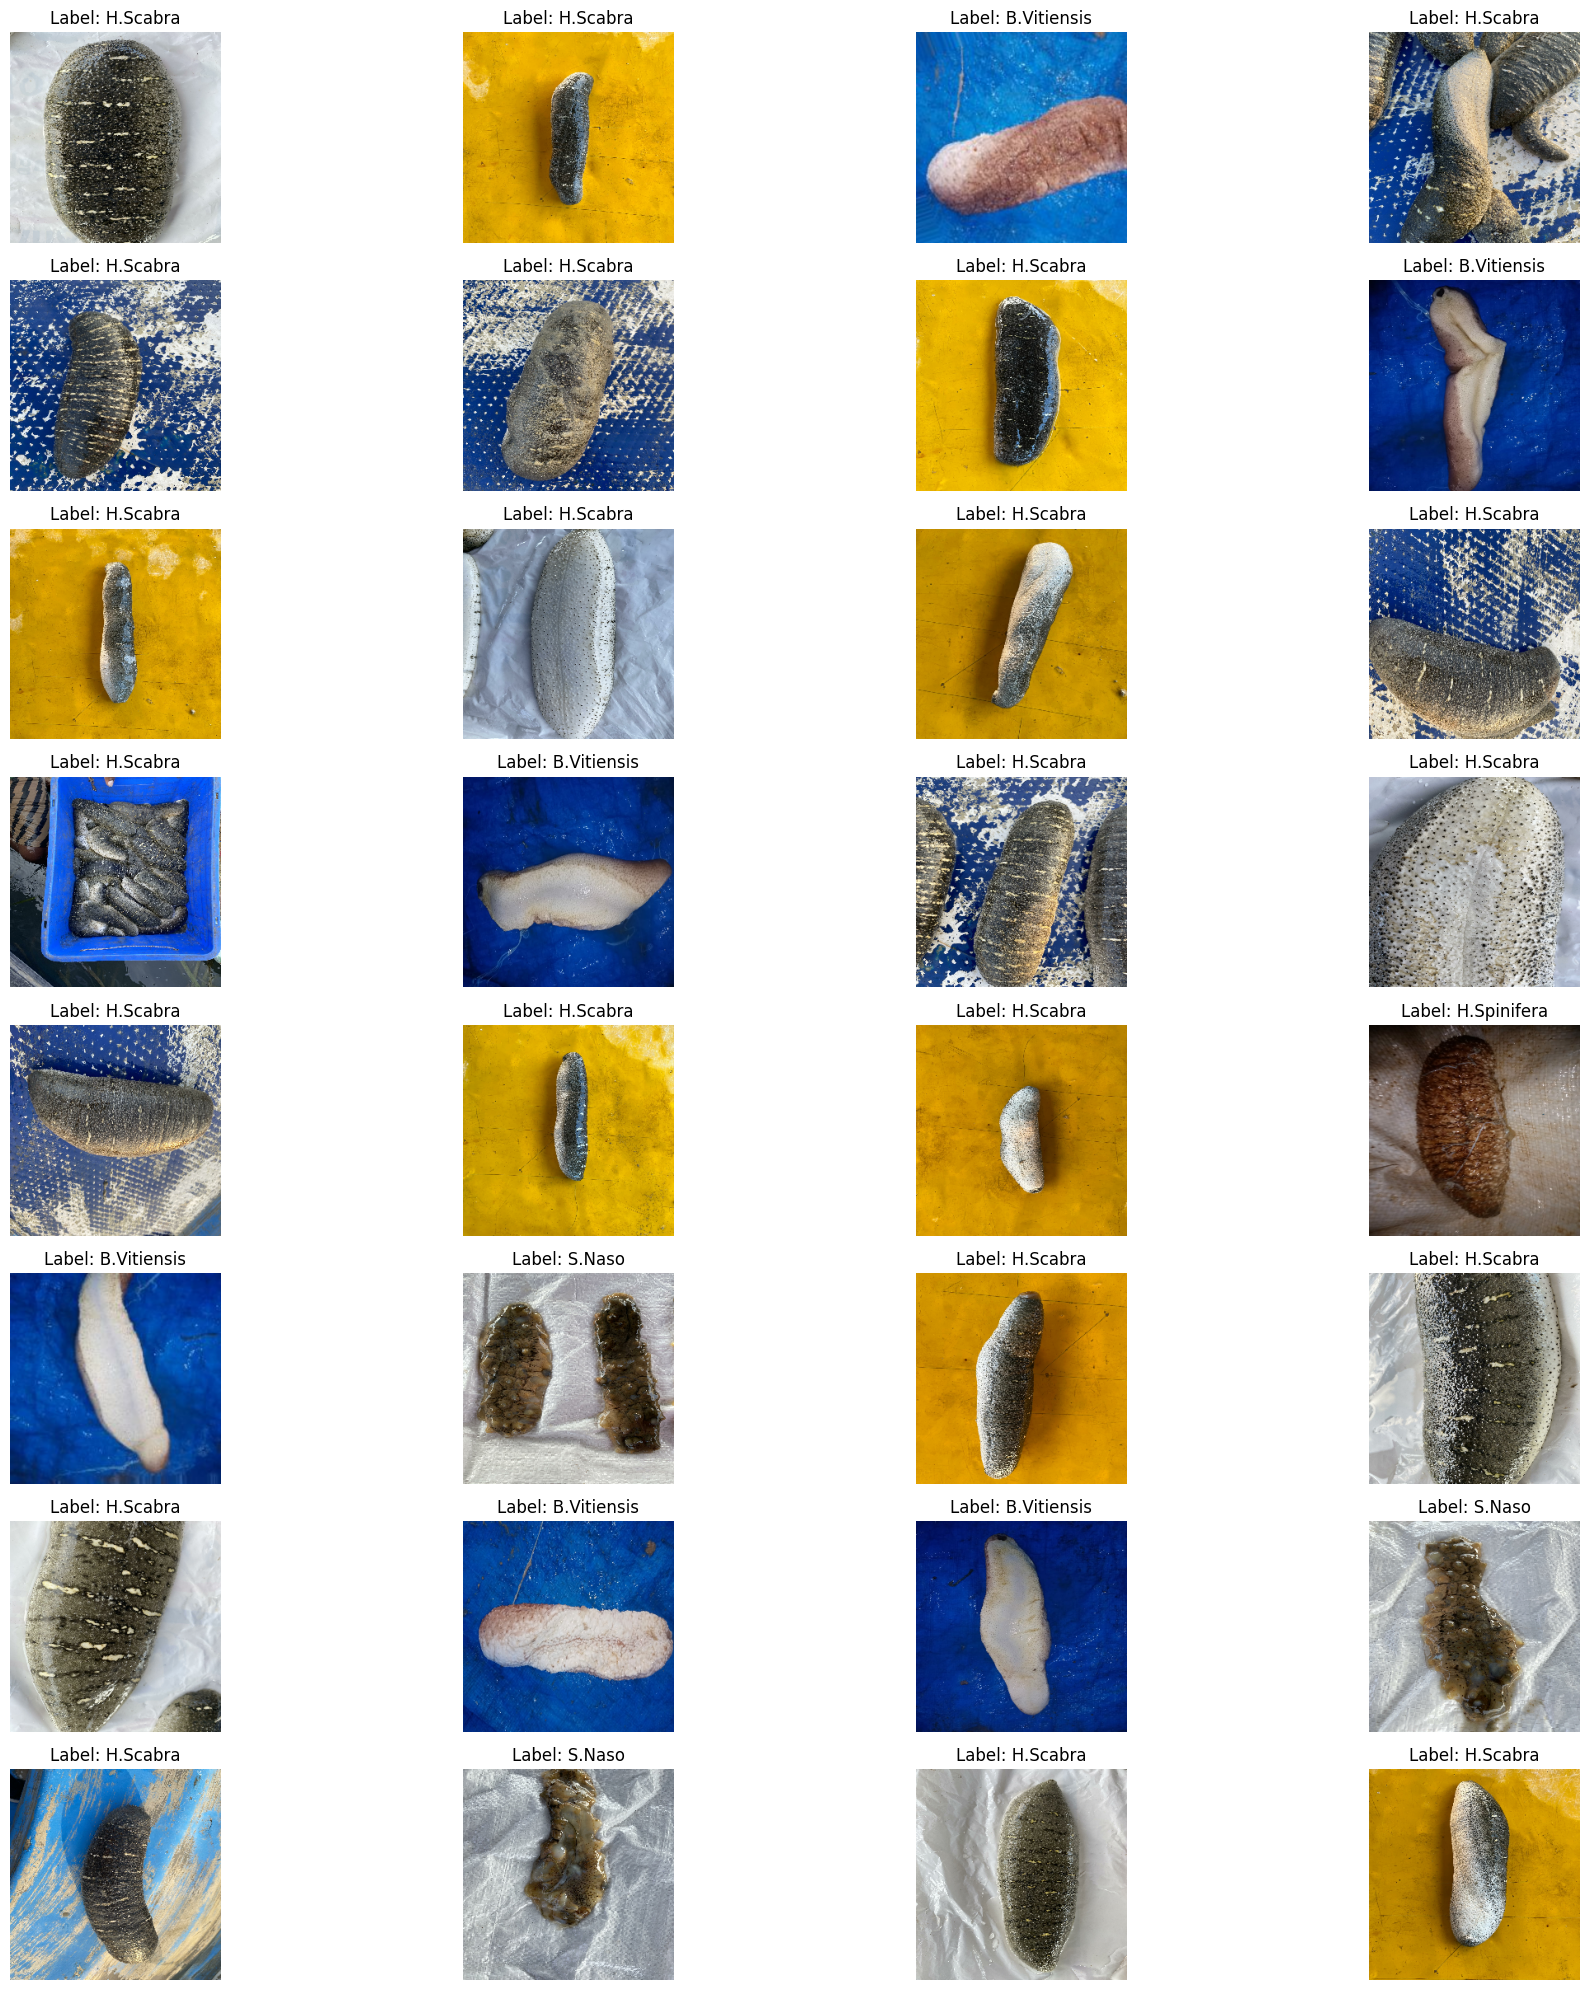

In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
X, y = batch

num_columns = min(len(X), 4)

fig, ax = plt.subplots(nrows = len(X)//num_columns, ncols=4, figsize=(20,20))

for i in range(len(X)):
  row_idx = i // num_columns
  col_idx = i % num_columns

  image = X[i]
  true_label = y[i]
  
  # Plot the image and display the true and predicted labels
  ax[row_idx, col_idx].imshow(image.astype(int))
  ax[row_idx, col_idx].set_title(f'Label: {class_label_dict[true_label]}')
  ax[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)

class_counts = {}

for _, labels in train:

    for label in labels:

        label_str = str(label.numpy())
        label_real = label.numpy()

        if label_str in class_counts:
            class_counts[label_str] += 1
        else:
            class_counts[label_str] = 1

for label, count in class_counts.items():
    print(f"Class {label}: {count}")

Class 0: 51
Class 2: 26
Class 1: 245
Class 3: 30


class 2 - 24/24 = 1

class 3 - 24/30 = 0.8

class 0 - 24/50 = 0.5

class 1 - 24/248 = 

In [ ]:
min_value = min(class_counts.values())

# class_weights = {0: 1 - class_counts['0']/total_count, 1: 1 - class_counts['1']/total_count, 2: 1 - class_counts['2']/total_count, 3: 1 - class_counts['3']/total_count}
class_weights = {0: min_value/class_counts['0'], 1: min_value/class_counts['1'], 2: min_value/class_counts['2'], 3: min_value/class_counts['3']}
class_weights

{0: 0.5098039215686274, 1: 0.10612244897959183, 2: 1.0, 3: 0.8666666666666667}

In [ ]:
num_classes = 4

data = data.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

In [ ]:
# data.as_numpy_iterator().next()

In [ ]:
train_size, val_size, test_size

(11, 1, 1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
# x_train = train.map(lambda x, y : x)
# y_train = train.map(lambda x, y :y)

# x_val = val.map(lambda x, y : x)
# y_val= val.map(lambda x, y :y)

# x_test = test.map(lambda x, y : x)
# y_test = test.map(lambda x, y :y)

##VGG part

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (256,256,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# x_train_vgg = conv_base.predict(x_train, verbose = 1)
# x_val_vgg = conv_base.predict(x_val, verbose = 1)
# x_test_vgg = conv_base.predict(x_test, verbose = 1)

In [ ]:
conv_base.trainable = False

In [ ]:
model = Sequential([
    
    conv_base,
    GlobalAveragePooling2D(),
    Dense(256, activation = 'relu'),
    Dropout(0.2),
    Dense(num_classes, activation = 'softmax')
])


In [ ]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 14,847,044
Trainable params: 132,356
Non-trainable params: 14,714,688
______________________________________

In [ ]:
root_dir = "/content/gdrive/MyDrive/Sea Cumcumber Images/live"

In [ ]:
logdir = os.path.join(root_dir, 'logs')

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback], class_weight=class_weights)

Epoch 1/5
11/11 [==============================] - 399s 35s/step - loss: 0.3925 - accuracy: 0.5227 - val_loss: 0.9119 - val_accuracy: 0.7500
Epoch 2/5
11/11 [==============================] - 363s 31s/step - loss: 0.2746 - accuracy: 0.7216 - val_loss: 0.6766 - val_accuracy: 0.9688
Epoch 3/5
11/11 [==============================] - 404s 36s/step - loss: 0.2241 - accuracy: 0.8892 - val_loss: 0.5005 - val_accuracy: 0.9062
Epoch 4/5
11/11 [==============================] - 397s 35s/step - loss: 0.1778 - accuracy: 0.8097 - val_loss: 0.4708 - val_accuracy: 0.8750
Epoch 5/5
11/11 [==============================] - 409s 35s/step - loss: 0.1359 - accuracy: 0.9119 - val_loss: 0.4797 - val_accuracy: 0.7812


In [ ]:
#Saving the model by giving a time and date

import datetime
current_datetime = datetime.datetime.now()
formatted_datetime = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")
model_name = 'live_classifier_model_{}.h5'.format(formatted_datetime)
model_path = os.path.join(root_dir, 'models', model_name)

In [ ]:
model.save(model_path)

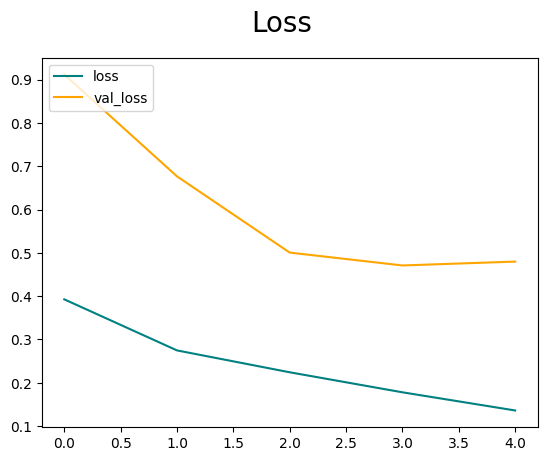

In [ ]:
# Loss and the validation loss in the training phase
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

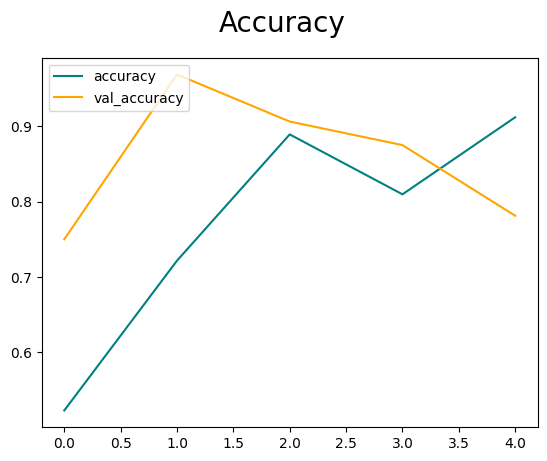

In [ ]:
#Training Accuracy and validation accuracy in the training phase

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_true = []
y_pred = []

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X) # predicting the test data set
  

    y_true.append(y)
    y_pred.append(yhat)

1/1 [==============================] - 28s 28s/step


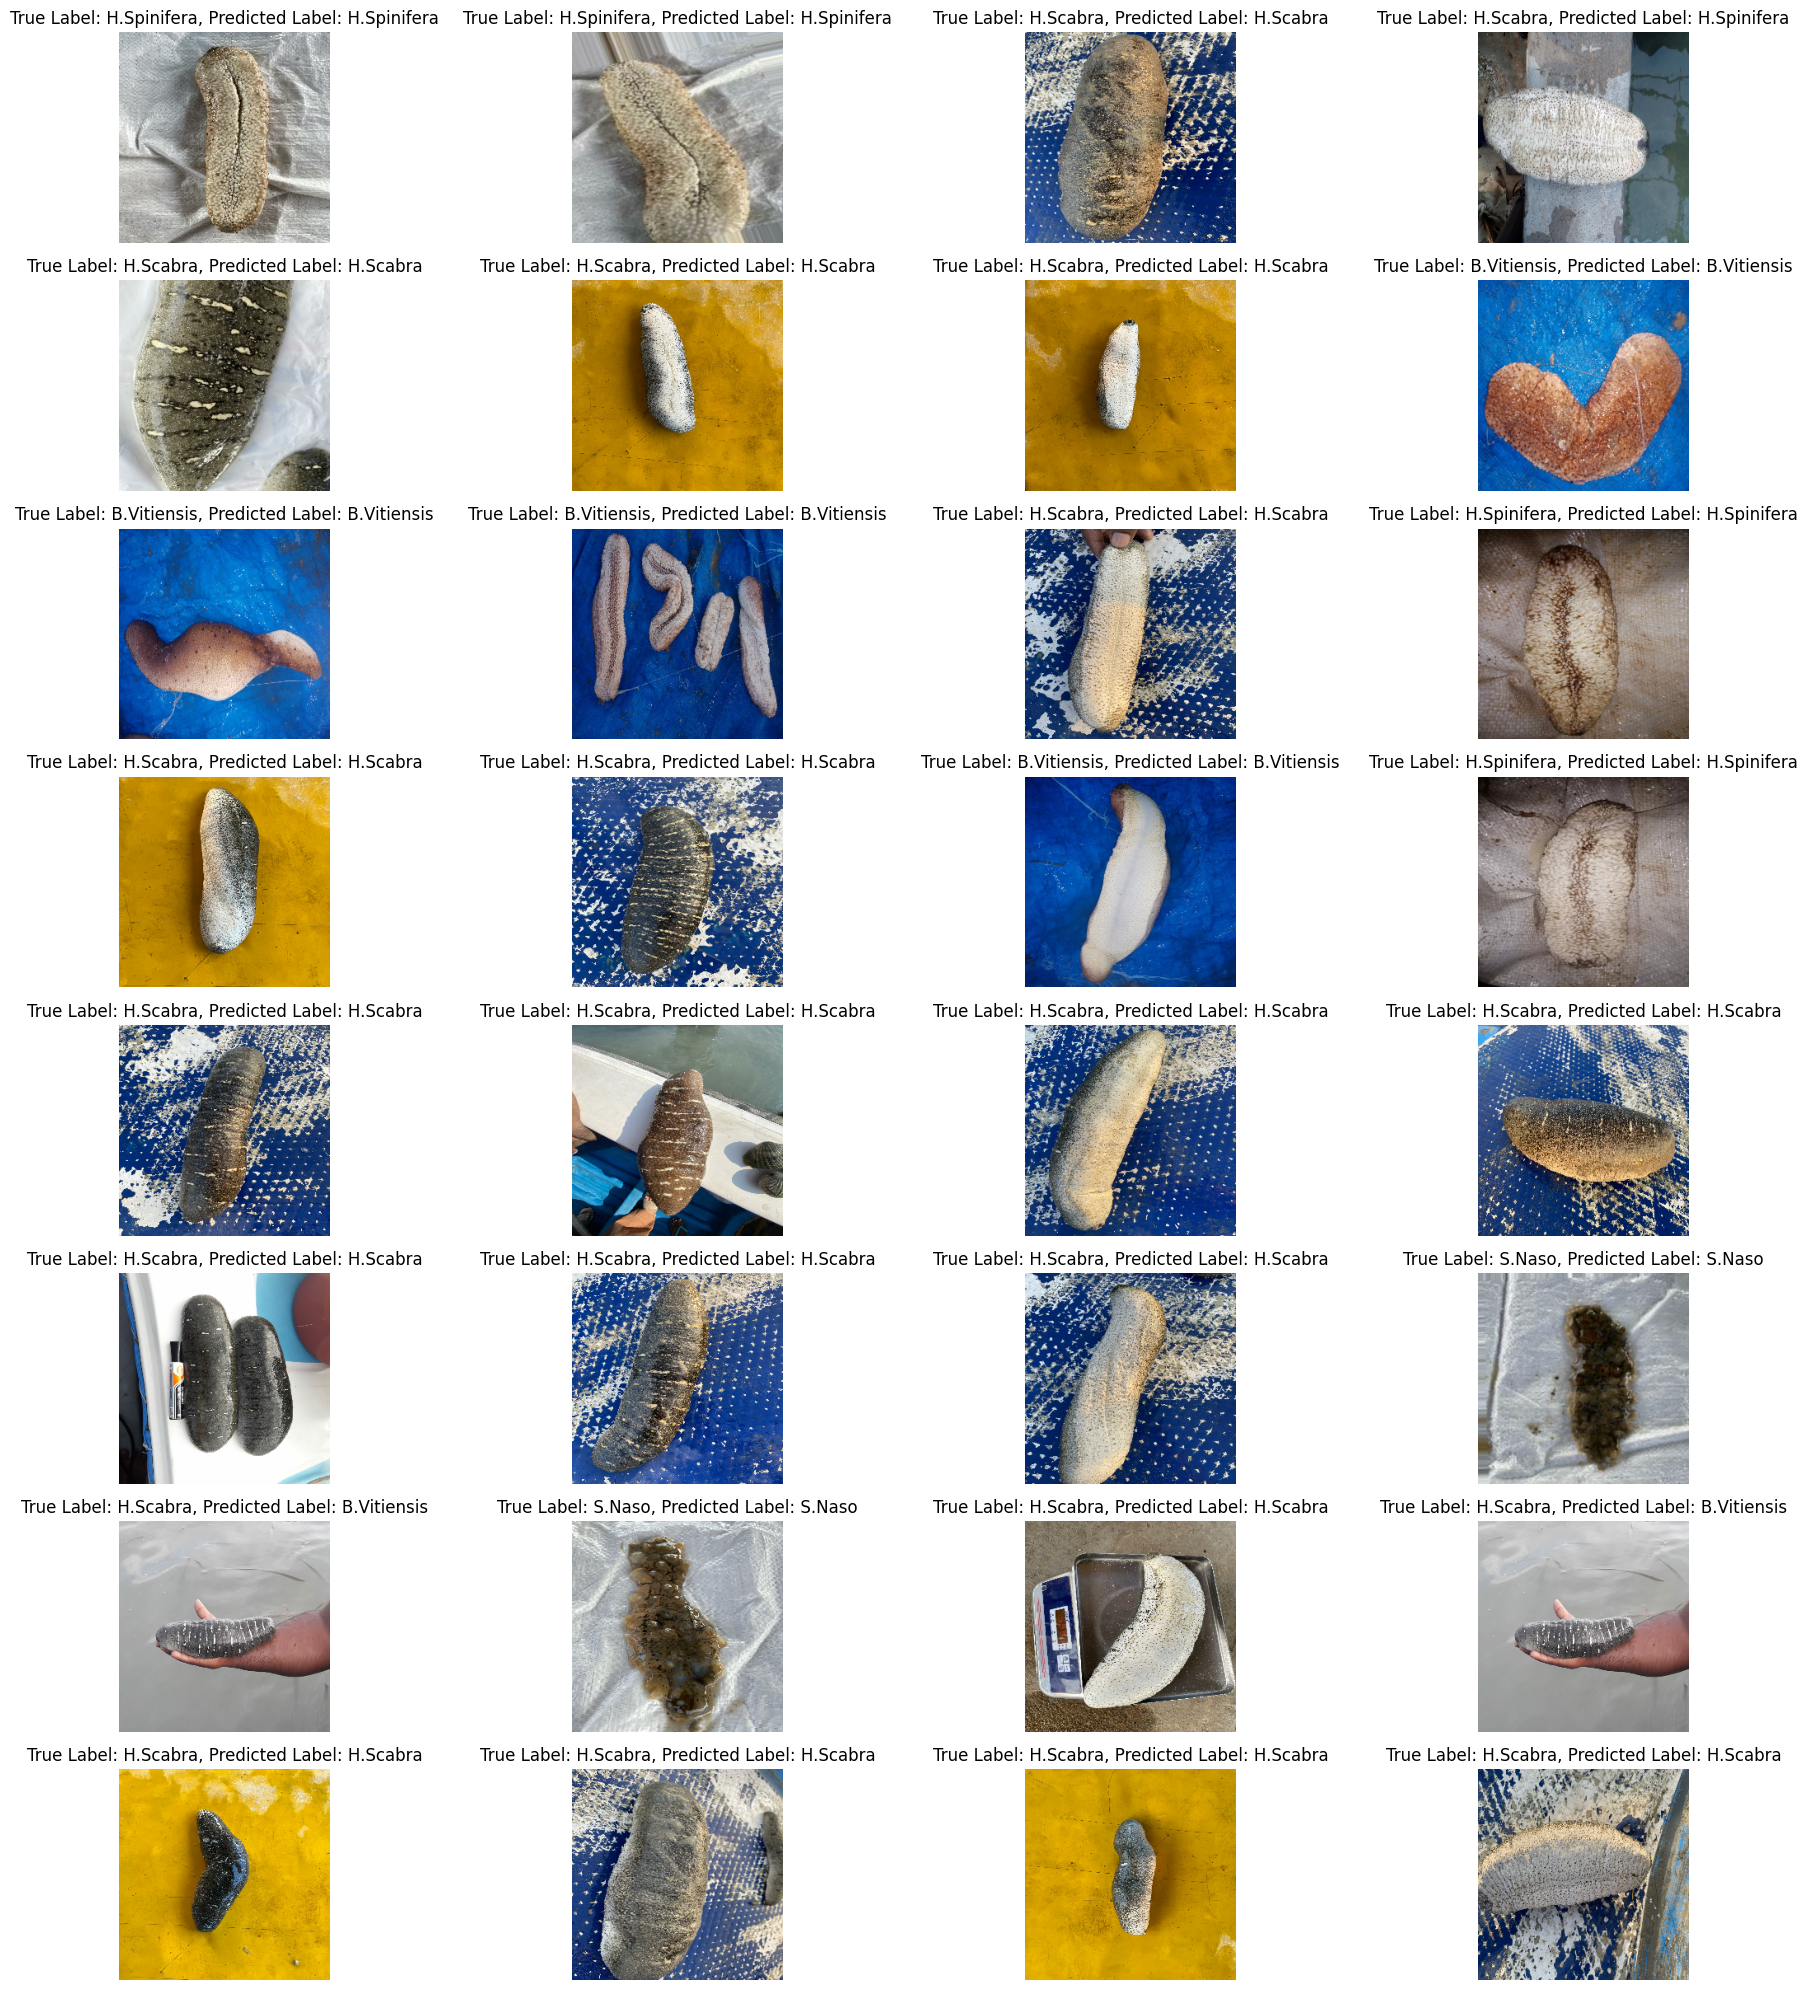

In [ ]:
fig, ax = plt.subplots(nrows = len(X)//4, ncols=4, figsize=(20,20))

for i in range(len(X)):
  row_idx = i // 4
  col_idx = i % 4

  image = X[i]
  true_label = y[i]
  predicted_label = yhat[i]
  
  # Convert one-hot encoded labels to class indices (if needed)
  true_label = np.argmax(true_label)
  predicted_label = np.argmax(predicted_label)
  
  # Plot the image and display the true and predicted labels
  ax[row_idx, col_idx].imshow(image)
  ax[row_idx, col_idx].set_title(f'True Label: {class_label_dict[true_label]}, Predicted Label: {class_label_dict[predicted_label]}')
  # ax[row_idx, col_idx].set_title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
  ax[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
y_pred = np.concatenate(y_pred, axis=0)
y_true = np.concatenate(y_true, axis=0)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.86      0.93        22
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         2

    accuracy                           0.91        32
   macro avg       0.87      0.97      0.90        32
weighted avg       0.93      0.91      0.91        32



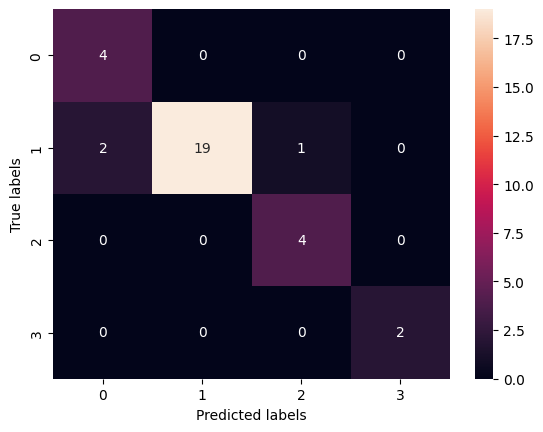

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
loaded_model = tf.keras.models.load_model(model_path)

In [ ]:
from tensorflow.keras.preprocessing import image

def classify_image(model, image_path):

  class_label_dict = {0: 'B.Vitiensis', 1: 'H.Scabra', 2: 'H.Spinifera', 3: 'S.Naso'}

  image_path = image_path
  img = image.load_img(image_path, target_size=(256, 256, 3))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0


  
  predictions = model.predict(img_array);

  predicted_probabilities = predictions[0]
  predicted_class = np.argmax(predicted_probabilities)

  plt.imshow(img)
  plt.title('Predition : {} | probability : {}'.format(class_label_dict[predicted_class], max(predicted_probabilities)))

1/1 [==============================] - 2s 2s/step


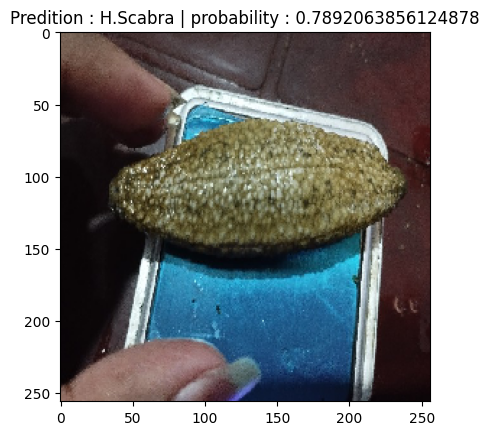

In [ ]:
img_path = '/content/1000063821.jpg'
classify_image(loaded_model, img_path)